# 라이브러리 호출

In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.tree import DecisionTreeClassifier

# 시드(seed) 고정

매번 고정된 결과를 얻기 위해서 사용합니다.  
시드를 고정하지 않는다면 같은 코드라도 매번 다른 결과가 나올 수 있습니다.  
항상 동일한 결과를 얻기 위해서 사용합니다.

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

# 데이터 불러오기
read_csv() 함수를 사용하여 데이터를 불러옵니다.

In [4]:
train = pd.read_csv('D:/전화 해지 여부 분류 AI 경진대회/data/train.csv')
test = pd.read_csv('D:/전화 해지 여부 분류 AI 경진대회/data/test.csv')

In [6]:
# train.csv 파일의 데이터를 확인합니다.
train.head(5)

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


# 데이터 정보

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
ID         30200 non-null object
가입일        30200 non-null int64
음성사서함이용    30200 non-null int64
주간통화시간     30200 non-null float64
주간통화횟수     30200 non-null int64
주간통화요금     30200 non-null float64
저녁통화시간     30200 non-null float64
저녁통화횟수     30200 non-null int64
저녁통화요금     30200 non-null float64
밤통화시간      30200 non-null float64
밤통화횟수      30200 non-null int64
밤통화요금      30200 non-null float64
상담전화건수     30200 non-null int64
전화해지여부     30200 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12943 entries, 0 to 12942
Data columns (total 13 columns):
ID         12943 non-null object
가입일        12943 non-null int64
음성사서함이용    12943 non-null int64
주간통화시간     12943 non-null float64
주간통화횟수     12943 non-null int64
주간통화요금     12943 non-null float64
저녁통화시간     12943 non-null float64
저녁통화횟수     12943 non-null int64
저녁통화요금     12943 non-null float64
밤통화시간      12943 non-null float64
밤통화횟수      12943 non-null int64
밤통화요금      12943 non-null float64
상담전화건수     12943 non-null int64
dtypes: float64(6), int64(6), object(1)
memory usage: 1.3+ MB


# 데이터 설명

In [11]:
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


In [26]:
# 한글 글꼴 깨질 때
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf' # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family = font_name)

Malgun Gothic


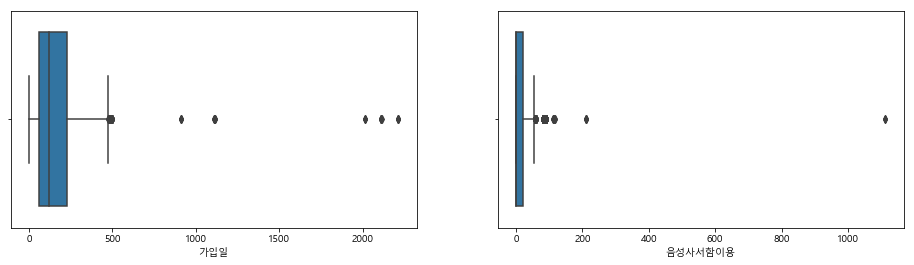

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(16, 4))
sns.boxplot(train['가입일'], ax=ax[0])
sns.boxplot(train['음성사서함이용'], ax=ax[1])
plt.show()

In [29]:
test.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
count,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000
mean,159.776713,12.312756,251.066221,159.761724,40.887059,263.656424,159.628216,25.440460,264.052963,157.692112,12.095035,2.301476
std,118.383432,28.069438,85.236623,103.648878,23.062830,75.232035,103.417132,8.288719,74.877379,101.640429,9.459368,2.058855
min,2.000000,0.000000,0.200000,0.000000,0.100000,0.200000,0.000000,0.000000,21.300000,20.000000,2.000000,0.000000
25%,63.000000,0.000000,222.700000,88.000000,24.400000,223.800000,87.000000,22.220000,223.700000,86.000000,4.880000,2.000000
50%,119.000000,1.000000,234.000000,115.000000,30.800000,242.700000,113.000000,23.300000,242.800000,111.000000,9.060000,2.000000
75%,228.000000,22.000000,289.800000,223.000000,45.900000,290.350000,223.000000,28.820000,290.700000,223.000000,20.290000,2.000000
max,2212.000000,1112.000000,481.800000,489.000000,118.100000,481.500000,490.000000,49.990000,481.700000,489.000000,44.980000,11.000000


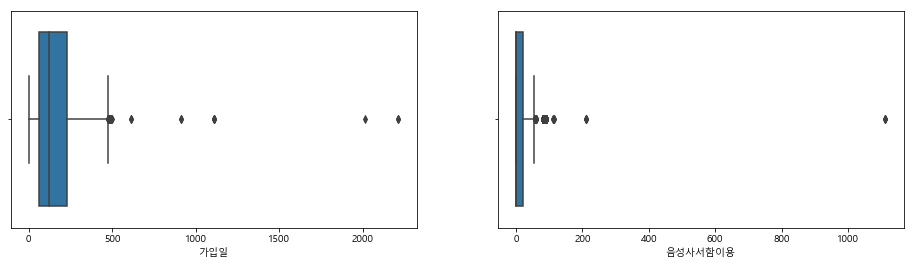

In [30]:
fig, ax = plt.subplots(1,2,figsize=(16, 4))
sns.boxplot(test['가입일'], ax=ax[0])
sns.boxplot(test['음성사서함이용'], ax=ax[1])
plt.show()

# Feature 별 히스토그램 분포
- info() 를 확인해 보면, train 컬럼(Cancellation Status)이 하나 더 많음

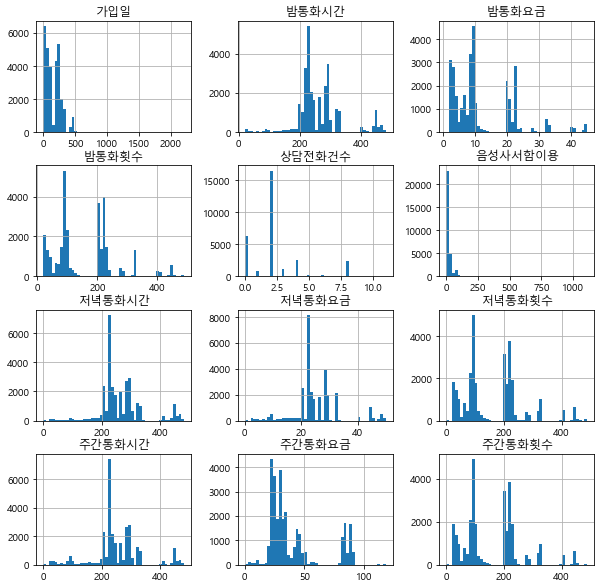

In [27]:
train.drop(['전화해지여부'], axis=1).hist(bins=50, figsize=(10,10))
plt.show()

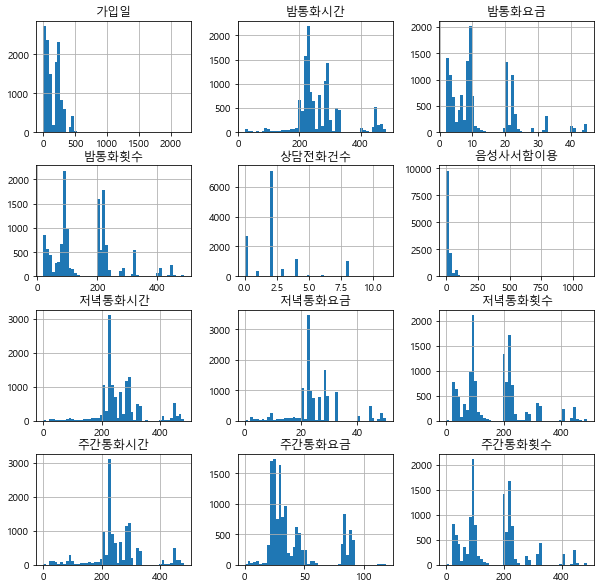

In [31]:
test.hist(bins=50, figsize=(10, 10))
plt.show()

다른 Feature들에 비해, Subscription Length와 Voice Mail Usage의 꼬리가 아주 두껍습니다.

이상치를 처리해 모양을 안정화해주면 좋을 것 같아, 저는 제거하거나 IQR Capping을 해주려고 합니다.

추가적으로, train과 test의 히스토그램 분포가 완전히 동일해 보이는 것으로 보아,
모든 feature들에 대해 계층적으로 샘플링된 것 같습니다.

# Boxplot을 활용해 이상치 처리하기
IQR Capping을 위해 Boxplot으로 구체적인 데이터 구성을 살펴본 뒤, Upper/Lower Whisker 값을 추출해보았습니다.

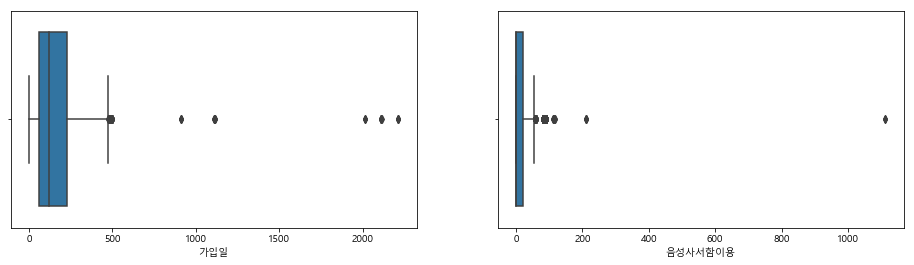

[<matplotlib.lines.Line2D object at 0x000001CCF68E9D68>, <matplotlib.lines.Line2D object at 0x000001CCF68E9E48>]
Whisker y-values for subplot 1:[-0.2  0.2]
Whisker y-values for subplot 1:[-0.2  0.2]
[<matplotlib.lines.Line2D object at 0x000001CCF67B5F60>, <matplotlib.lines.Line2D object at 0x000001CCF67B5A90>]
Whisker y-values for subplot 2:[-0.2  0.2]
Whisker y-values for subplot 2:[-0.2  0.2]


In [41]:
fig, ax = plt.subplots(1,2,figsize=(16, 4))
sns.boxplot(train['가입일'], ax=ax[0])
sns.boxplot(train['음성사서함이용'], ax=ax[1])
plt.show()


for i in range(len(ax)):
    whiskers= ax[i].lines[2:4]
#     print("whiskers : ".format(whiskers))
    print(whiskers)
    for whisker in whiskers:
        y_data = whisker.get_ydata()
        print(f"Whisker y-values for subplot {i+1}:{y_data}")

# 독립변수(x_train), 종속변수(y_train)로 나누기  
우리는 독립변수 데이터를 사용하여 종속변수를 예측하여야 합니다.  
우리가 예측해야하는 종속변수는 '전화해지여부' 컬럼입니다.  
따라서 종속변수를 y_train 변수에 할당하고 독립변수는 x_train 변수에 할당합니다.  

ID는 모델이 종속변수를 예측할 때 도움이 되지 않으므로 해당 컬럼을 제거합니다.

In [5]:
# 예측에 도움이 될 수 없는 ID 컬럼을 제거합니다.
# x_train은 독립변수이므로 종속변수를 제거합니다.
x_train = train.drop(['ID', '전화해지여부'], axis = 1)

# y_train은 종속변수의 값을 설정해줍니다.
y_train = train['전화해지여부']

# test 데이터에서 예측에 도움이 될 수 없는 ID 컬럼을 제거합니다.
test = test.drop('ID', axis = 1)

# 모델 정의  
의사결정나무 모델을 사용하기 위해 모델을 정의합니다.  
[의사결정나무 모델의 개념을 알고 싶다면 여기를 클릭해주세요.](https://dacon.io/competitions/open/235698/talkboard/403509?page=1&dtype=recent)

In [6]:
# 모델 인자에 random_state를 넣음으로써 시드고정의 효과를 얻을 수 있습니다.
model = DecisionTreeClassifier(random_state = 42)

# 모델 학습
위에서 설정한 독립변수와 종속변수를 모델에 입력하면 학습을 수행할 수 있습니다.

In [7]:
# fit() 함수는 모델을 데이터에 맞추겠다는 의미를 가지고 있습니다.
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

# 예측
학습을 완료한 모델에 테스트 데이터를 입력하면 예측값을 얻을 수 있습니다.

In [8]:
# predict() 함수는 독립변수(테스트데이터)를 입력받았을 때 종속변수를 예측합니다.
pred = model.predict(test)

#  파일 저장
예측 결과를 제출하기 위해서 예측값을 제출 파일에 할당하고 저장합니다.

In [9]:
# 제출 파일을 불러옵니다.
submit = pd.read_csv('./sample_submission.csv')

In [10]:
# 예측한 값을 '전화해지여부' 컬럼에 할당합니다.
submit['전화해지여부'] = pred
submit.head()

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,1


In [11]:
# 예측한 파일을 저장합니다.
submit.to_csv('./submit.csv', index = False)